Table of Content:

<a href="#data_handling">1. Data Handling</a>
<br><a href="#data_handling1.1">1.1. Getting sense of the data</a>
<br><a href="#data_handling1.2">1.2. Univariate and Bivariate Data Exploration</a>
<br><a href="#data_handling1.3">1.3. Treatment of data for missing values</a>
<br><a href="#data_handling1.4">1.4. Categorical Data Essense</a>
<br><a href="#data_handling1.4.1">1.4.1. About Categorical Data</a>
<br><a href="#data_handling1.4.2">1.4.2. Treatment Techniques for Categorical Data</a>
<br><a href="#data_handling1.4.3">1.4.3. One hot encoding implementation</a>
<br><a href="#data_handling1.5">1.5. Data Scaling</a>
<br><br><a href="#model_training2">2. Model Training</a>
<br><a href="#model_training2.1">2.1. What is Regression?</a>
<br><a href="#model_training2.2">2.2. Linear Regression</a>
<br><a href="#model_training2.3">2.3. Ridge and Lasso Regression</a>
<br><a href="#model_training2.3.1">2.3.1. Lasso Regression Implementation</a>
<br><a href="#model_training2.3.2">2.3.2. Ridge Regression Implementation</a>
<br><br><a href="#model_stats3">3. Stats Model Interpretation and Backward Elimination Technique</a>
<br><a href="#model_stats3.1">3.1. Selection Techniques in Multiple Regression</a>
<br><a href="#model_stats3.2">3.2. How to perform backward elimination?</a>
<br><a href="#model_stats3.3">3.3. Why Stats Model Library</a>










































In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction
import os

# 1. Data Handling
<a id="data_handling" >

In [2]:
diamond_data = pd.read_csv("../input/diamonds.csv")

## 1.1. Getting sense of the data
<a id="data_handling1.1" >

In [3]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### There's an unecessary column which needs to be dropped

In [5]:
diamond_data = diamond_data.drop(["Unnamed: 0"],axis=1)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.2. Univariate and Bivariate Data Exploration
<a id="data_handling1.2" >

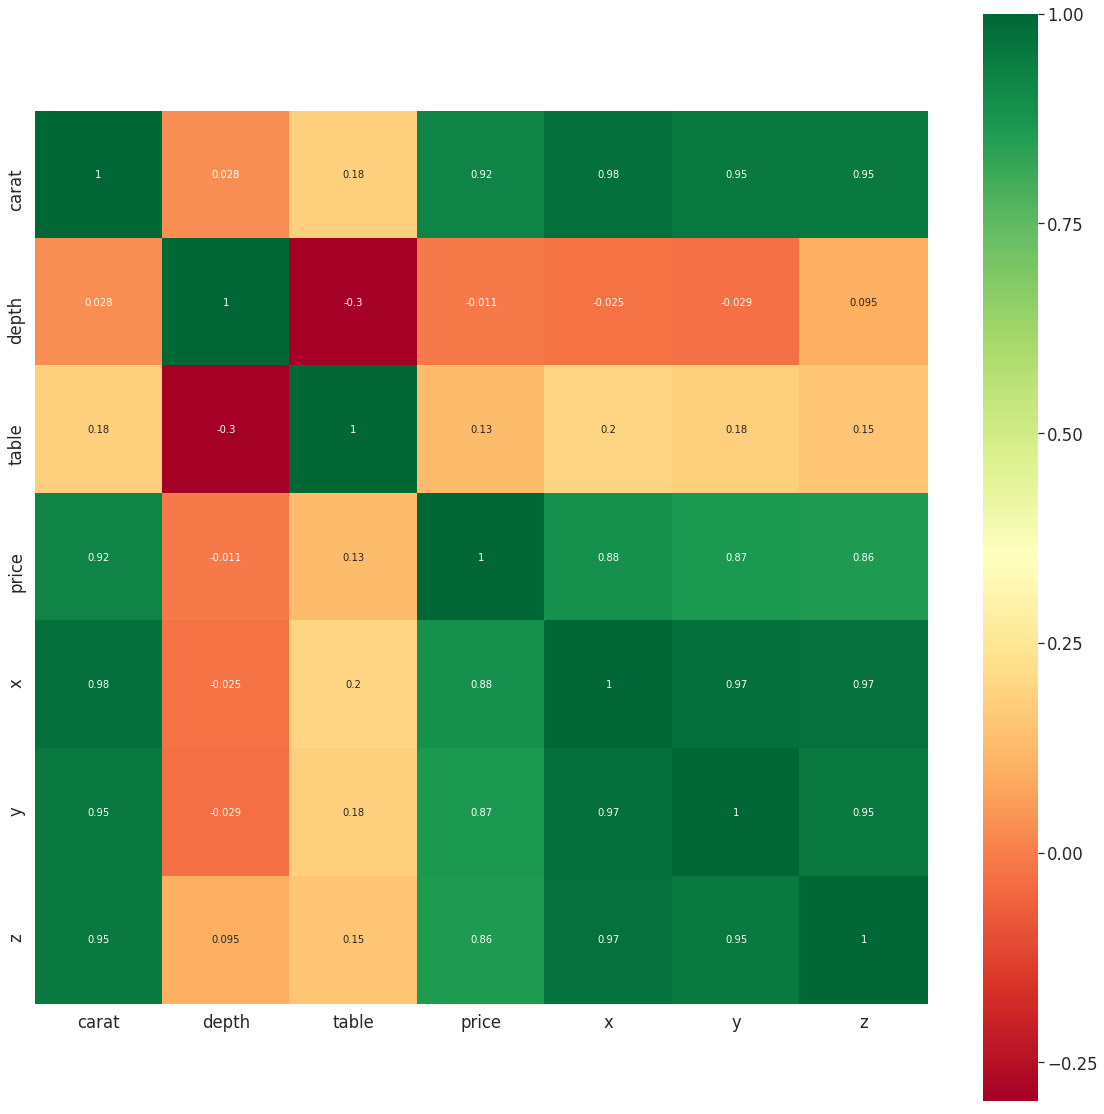

In [6]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diamond_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

### Few observations from the above plot
1. x,y, and z have a very strong relation with price but surprisingly depth (which comes from x,y, and z) doesn't has a significant relation with price.
2. Carat has a strong relation with price
3. Table doesn't have a significant relation with price or any other variable as well ( We can try dropping that when making the model) 

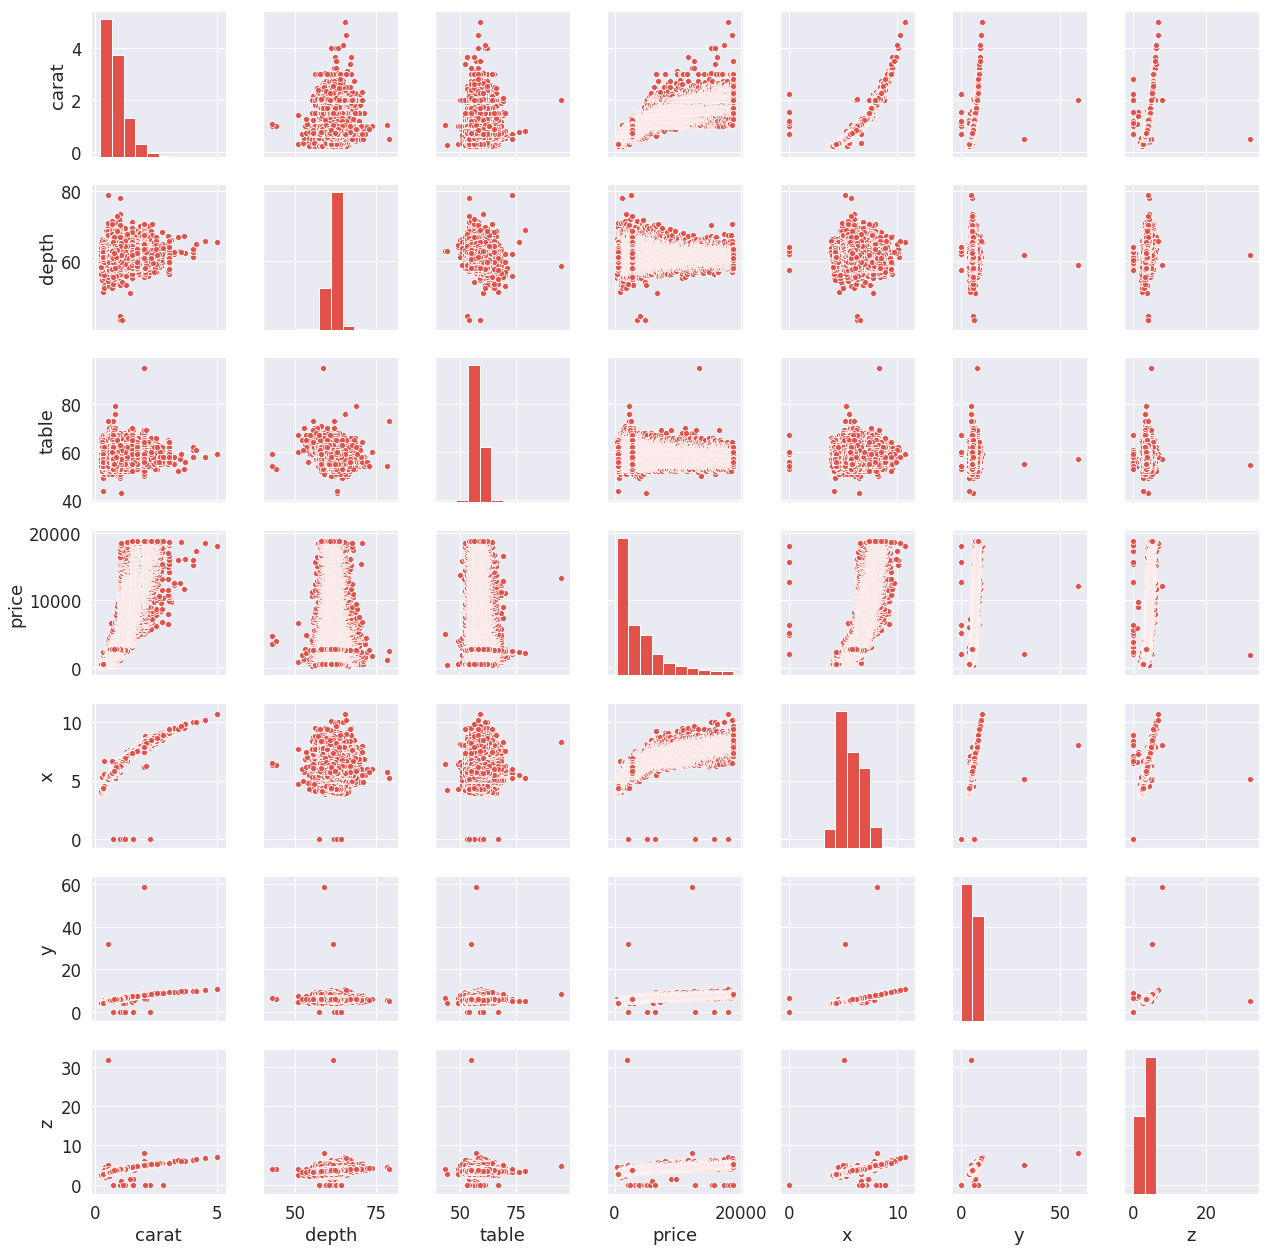

In [7]:
p=sns.pairplot(diamond_data)

In [8]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [9]:
print("Number of rows with x == 0: {} ".format((diamond_data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamond_data.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


### A zero value in these rows means missing data so we can replace the zeros with nan. Another thing to notice is that the depth column doesn't have a single zero value. We know that depth is calculated using the three parameters only.

In [10]:
diamond_data[['x','y','z']] = diamond_data[['x','y','z']].replace(0,np.NaN)

In [11]:
diamond_data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

## 1.3. Treatment of data for missing values
<a id="data_handling1.3" >

In [12]:
diamond_data.dropna(inplace=True)

In [13]:
diamond_data.shape

(53920, 10)

#### Let's check if the data has any null values

In [14]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### What to do with the zero's in x,y and z?

Since the dataset is big enough dropping 20 rows shouldn't cost us much hence the nans have been dropped.

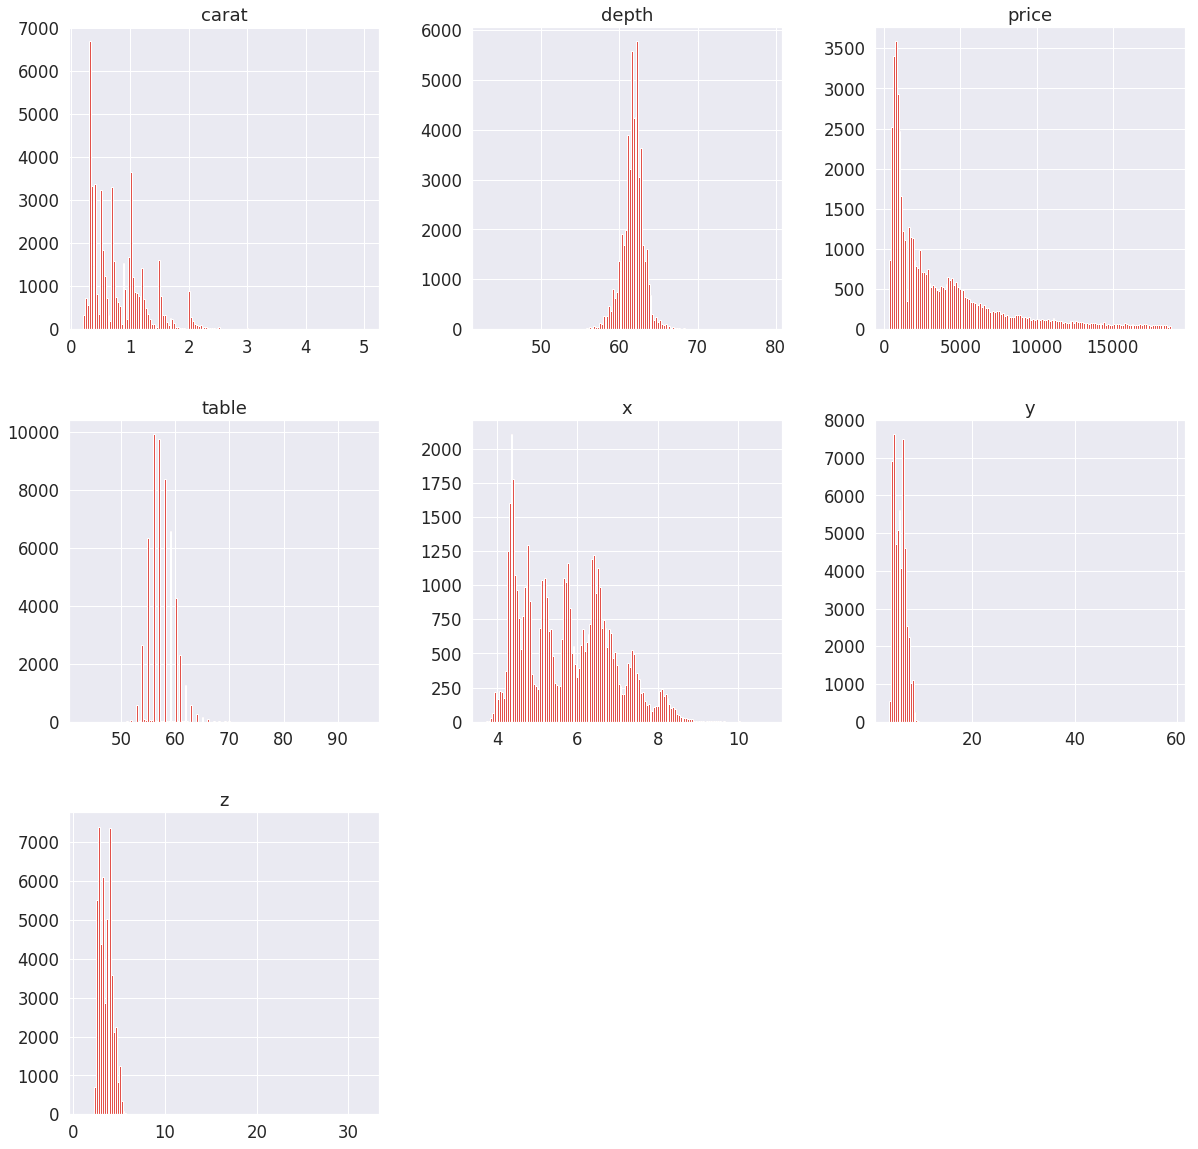

In [15]:
p = diamond_data.hist(figsize = (20,20),bins=150)

## 1.4. Categorical Data Essense
<a id="data_handling1.4" >

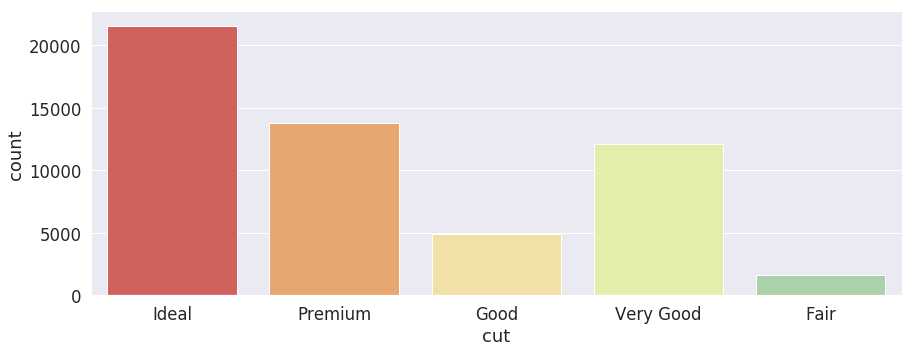

In [16]:
p = sns.factorplot(x='cut', data=diamond_data , kind='count',aspect=2.5 )

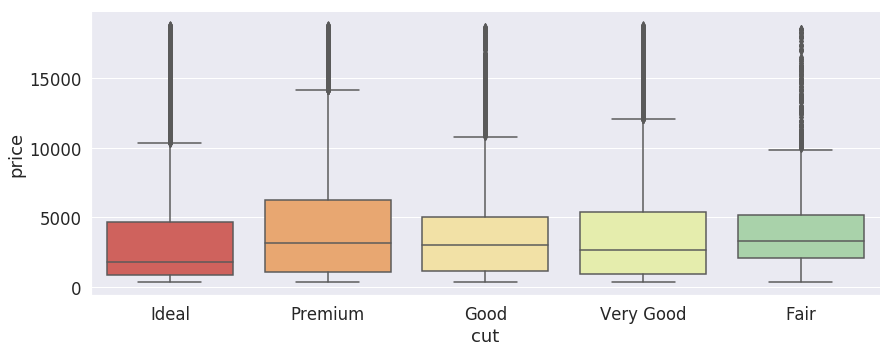

In [17]:
p = sns.factorplot(x='cut', y='price', data=diamond_data, kind='box' ,aspect=2.5 )

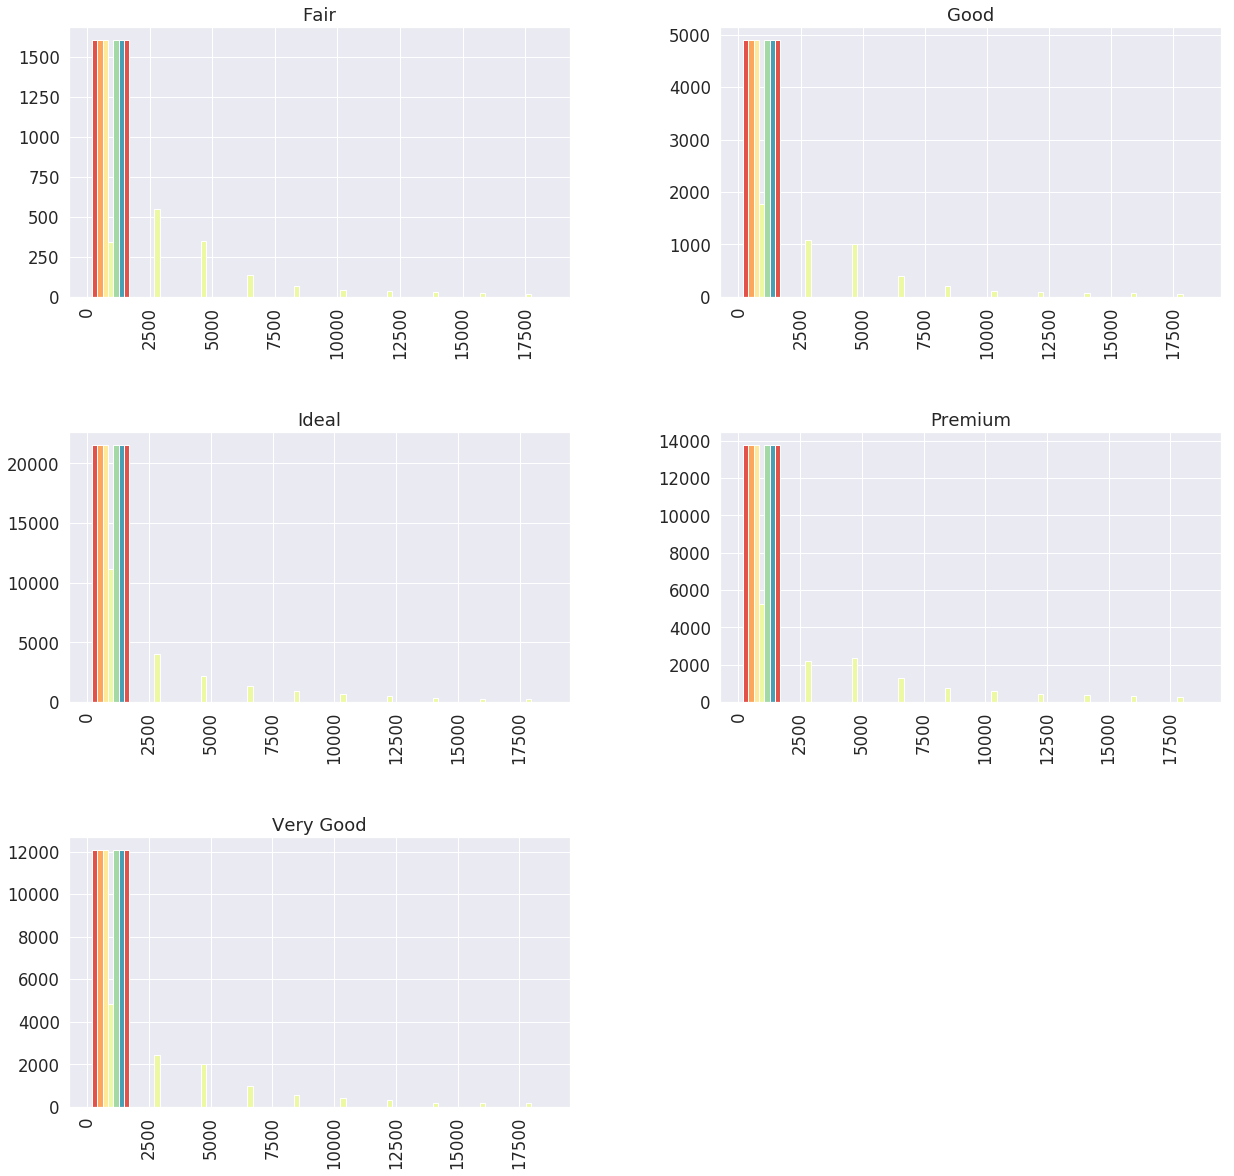

In [18]:
p = diamond_data.hist(figsize = (20,20), by=diamond_data.cut,grid=True)

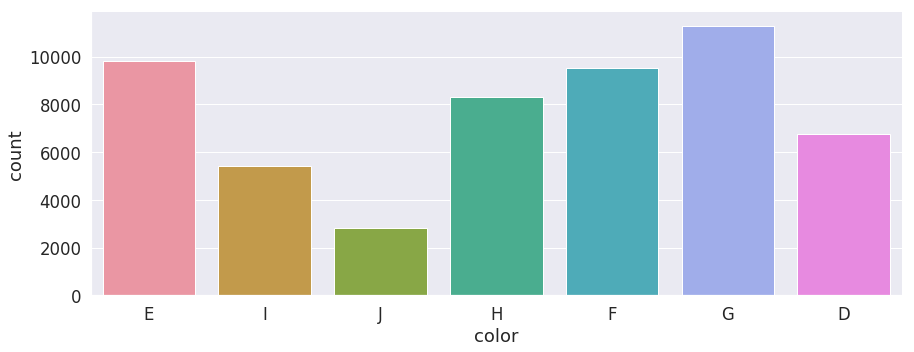

In [19]:
p = sns.factorplot(x='color', data=diamond_data , kind='count',aspect=2.5 )

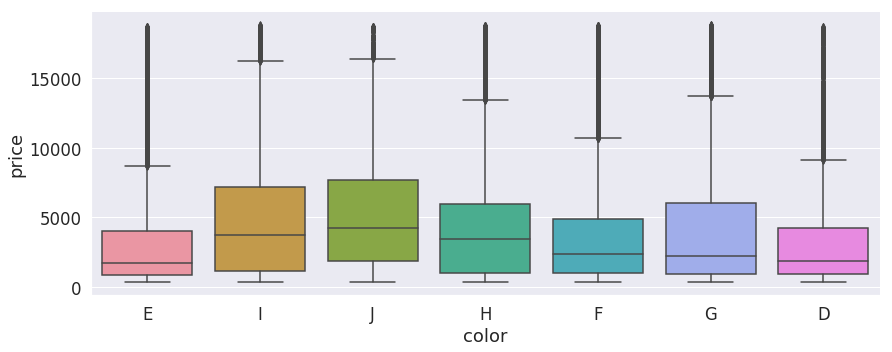

In [20]:
p = sns.factorplot(x='color', y='price', data=diamond_data, kind='box' ,aspect=2.5 )

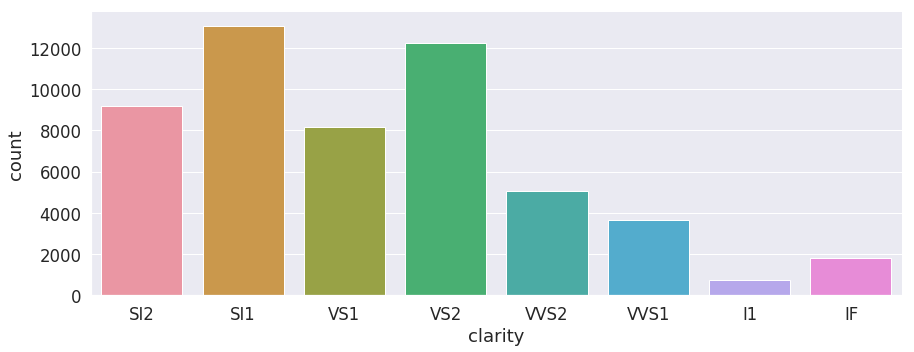

In [21]:
p = sns.factorplot(x='clarity', data=diamond_data , kind='count',aspect=2.5 )

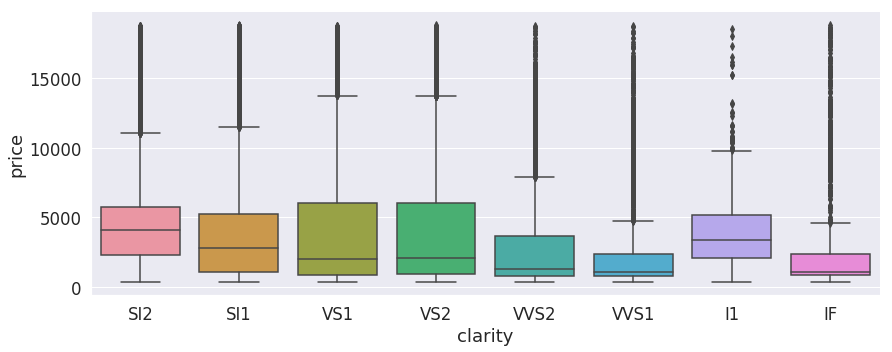

In [22]:
p = sns.factorplot(x='clarity', y='price', data=diamond_data, kind='box' ,aspect=2.5)

### Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive. 
### For example in the cut category, be it ideal, fair or any other type, there are diamonds in those categories with high prices. 

#### *It somehow makes me feel that these categories have less of an influence on the price. Please let me know in the comment section.*

#### So far so good but what about the categorical data in the columns cut,clarity and color?? The model doesn't take strings!!

## 1.4.1. About Categorical Data
<a id="data_handling1.4.1" >

## What is Categorical Data?
Categorical data are variables that contain label values rather than numeric values.

The number of possible values is often limited to a fixed set.

Categorical variables are often called nominal.

Some examples include:

A “pet” variable with the values: “dog” and “cat“.
A “color” variable with the values: “red“, “green” and “blue“.
A “place” variable with the values: “first”, “second” and “third“.
Each value represents a different category.

Some categories may have a natural relationship to each other, such as a natural ordering.

The “place” variable above does have a natural ordering of values. This type of categorical variable is called an ordinal variable.



### What is the Problem with Categorical Data?
Some algorithms can work with categorical data directly.

For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.




## 1.4.2. Treatment Techniques for Categorical Data
<a id="data_handling1.4.2" >

### How to Convert Categorical Data to Numerical Data?
This involves two steps:

### 1. Integer Encoding
As a first step, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called a label encoding or an integer encoding and is easily reversible.

For some variables, this may be enough.

The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

For example, ordinal variables like the “place” example above would be a good example where a label encoding would be sufficient.

### 2. One-Hot Encoding
For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.


For further reference : https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## 1.4.3. One hot encoding implementation
<a id="data_handling1.4.3" >

### One hot encoding to the rescue!

![](https://files.realpython.com/media/Introduction-to-Python_Watermarked.48eeee4e1109.jpg)

In [23]:
one_hot_encoders_diamond_data =  pd.get_dummies(diamond_data)
one_hot_encoders_diamond_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [24]:
# a structured approach
cols = one_hot_encoders_diamond_data.columns
diamond_clean_data = pd.DataFrame(one_hot_encoders_diamond_data,columns= cols)
diamond_clean_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


## 1.5. Data Scaling
<a id="data_handling1.5" >

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data[['carat','depth','x','y','z','table']]),columns=['carat','depth','x','y','z','table'],index=diamond_clean_data.index)

In [26]:
numericals.head()

,carat,depth,x,y,z,table
0,-1.198204,-0.174203,-1.591573,-1.539219,-1.580084,-1.099725
1,-1.240417,-1.361090,-1.645173,-1.662014,-1.750896,1.585988
2,-1.198204,-3.385781,-1.502241,-1.460280,-1.750896,3.376463
3,-1.071566,0.454149,-1.368242,-1.319943,-1.295396,0.243131
4,-1.029353,1.082501,-1.243176,-1.214690,-1.124583,0.243131


In [27]:
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]

In [28]:
diamond_clean_data_standard.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Let's take a look at the correlation heatmap 
#### One cool thing is that when we plot before and after standardisation the stats are still that same which is just yet another sign of how useful standardisation is 

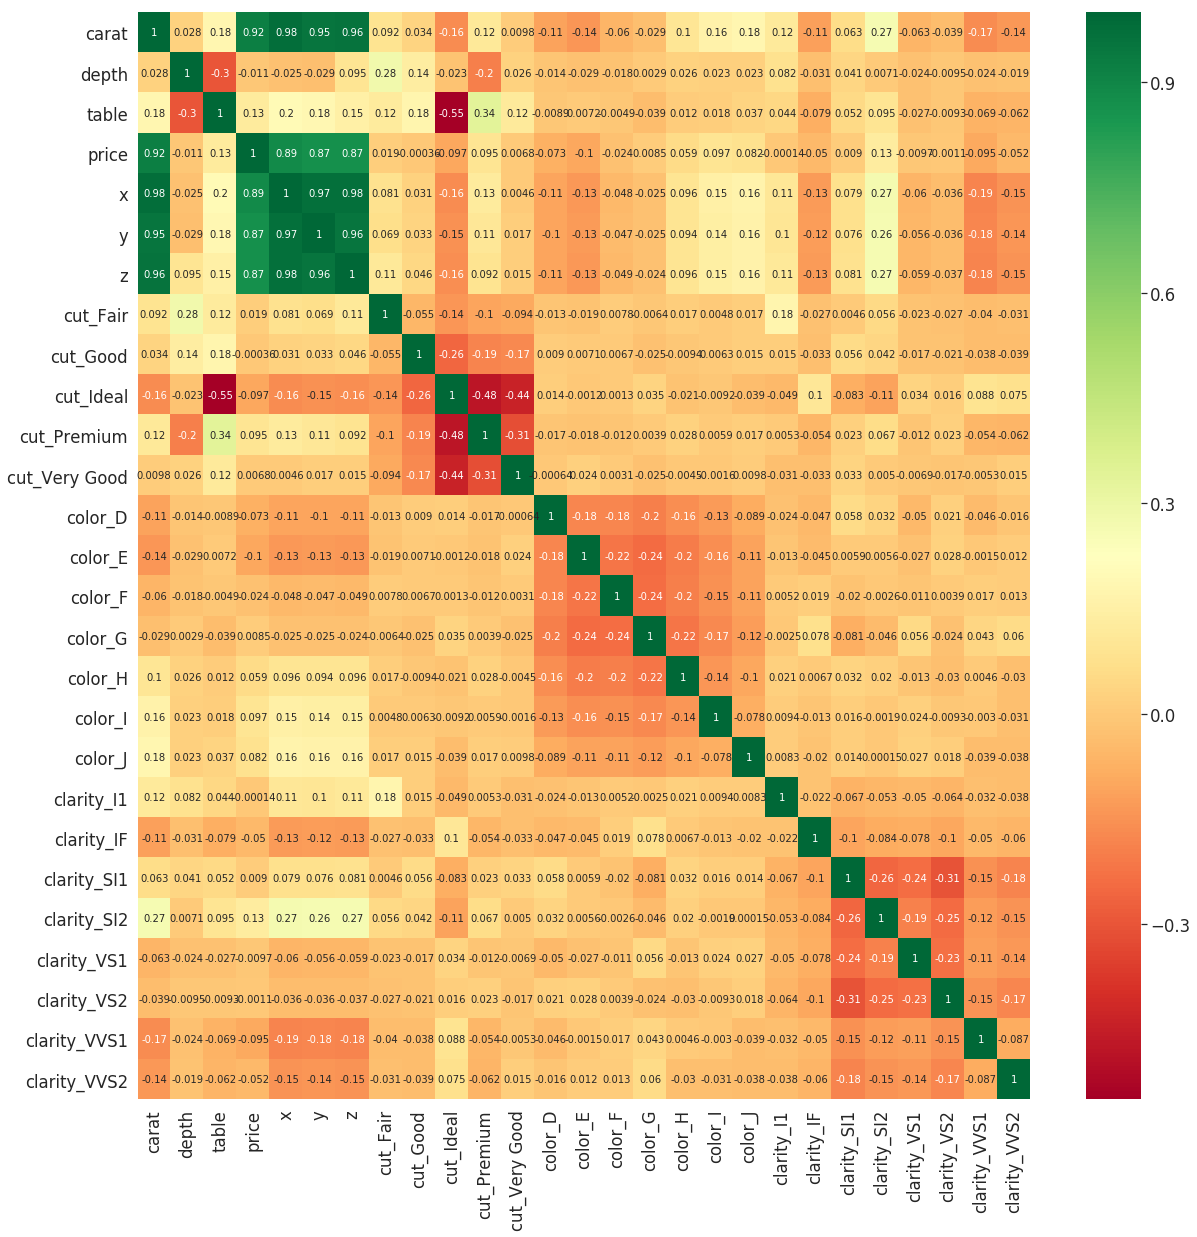

In [29]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diamond_clean_data.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

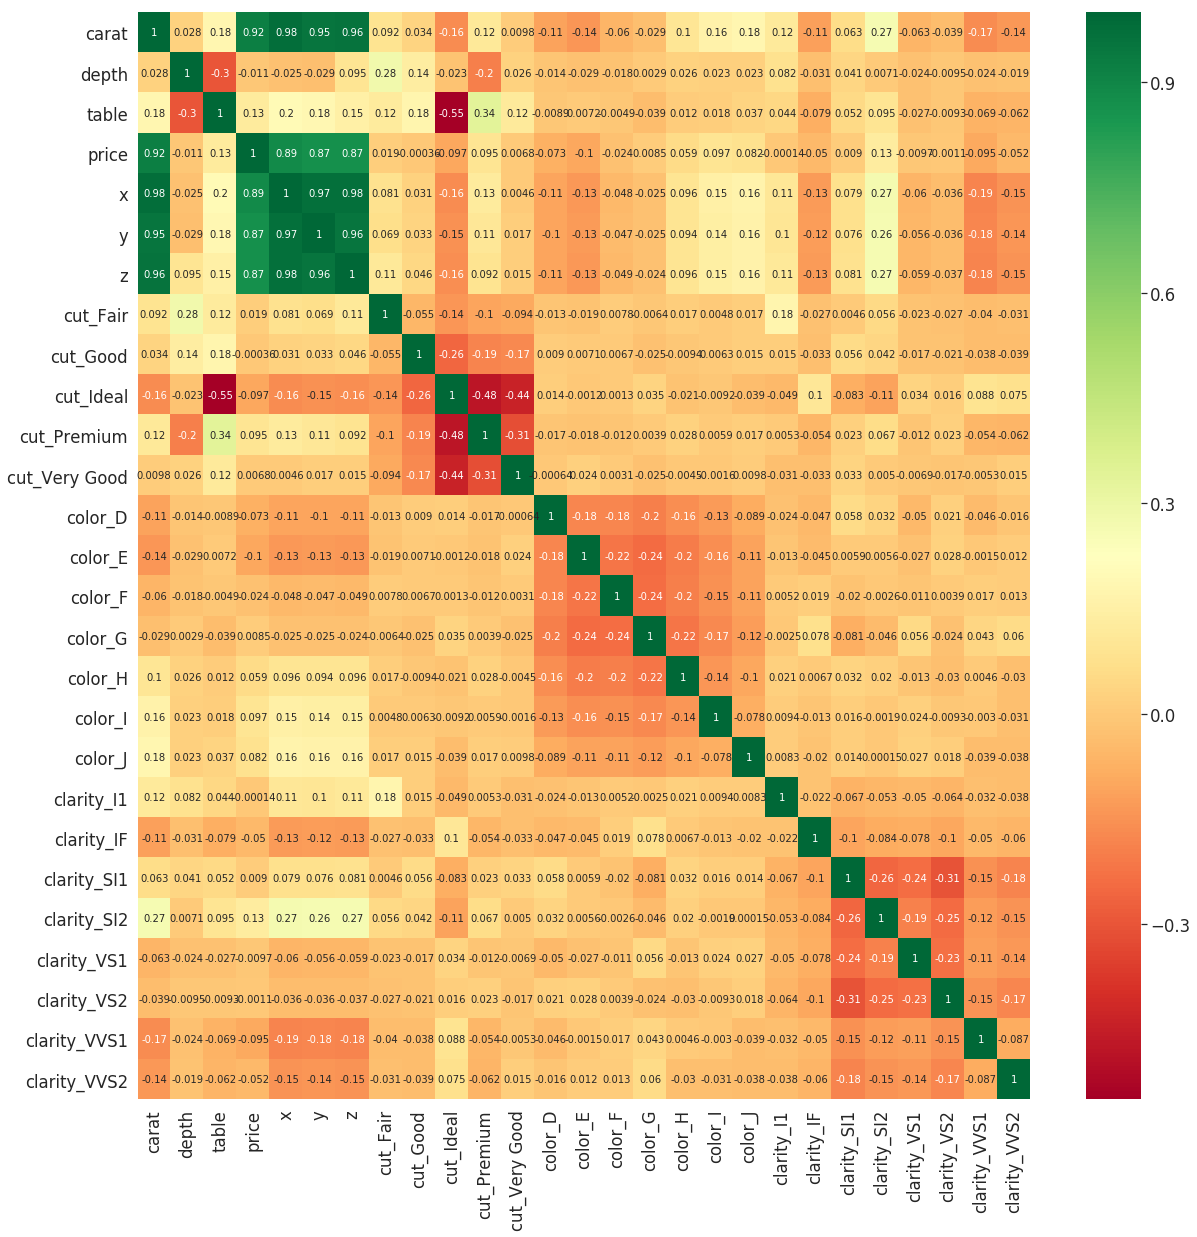

In [30]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diamond_clean_data_standard.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

### **Here we can justify the table column because is shows some correlation with the one hot encoded variables so let's not drop it**

In [31]:
x = diamond_clean_data_standard.drop(["price"],axis=1)
y = diamond_clean_data_standard.price

In [32]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

# 2. Model Training
<a id="model_training2" >

## 2.1. What is Regression?
<a id="model_training2.1" >

### Regression is a statistical technique that helps in qualifying the relationship between the interrelated economic variables. The first step involves estimating the coefficient of the independent variable and then measuring the reliability of the estimated coefficient. This requires formulating a hypothesis, and based on the hypothesis, we can create a function.

If a manager wants to determine the relationship between the firm’s advertisement expenditures and its sales revenue, he will undergo the test of hypothesis. Assuming that higher advertising expenditures lead to higher sale for a firm. The manager collects data on advertising expenditure and on sales revenue in a specific period of time. This hypothesis can be translated into the mathematical function, where it leads to −

### Y = A + Bx

Where Y is sales, x is the advertisement expenditure, A and B are constant.

After translating the hypothesis into the function, the basis for this is to find the relationship between the dependent and independent variables. The value of dependent variable is of most importance to researchers and depends on the value of other variables. Independent variable is used to explain the variation in the dependent variable. It can be classified into two types −

1. Simple regression − One independent variable

2. Multiple regression − Several independent variables

1. Simple Regression
Following are the steps to build up regression analysis −

Specify the regression model
Obtain data on variables
Estimate the quantitative relationships
Test the statistical significance of the results
Usage of results in decision-making
Formula for simple regression is −

### Y = a + bX + u

Y= dependent variable

X= independent variable

a= intercept

b= slope

u= random factor

Cross sectional data provides information on a group of entities at a given time, whereas time series data provides information on one entity over time. When we estimate regression equation it involves the process of finding out the best linear relationship between the dependent and the independent variables.

## Method of Ordinary Least Squares (OLS)
Ordinary least square method is designed to fit a line through a scatter of points is such a way that the sum of the squared deviations of the points from the line is minimized. It is a statistical method. Usually Software packages perform OLS estimation.

### Y = a + bX

## Co-efficient of Determination (R2)
Co-efficient of determination is a measure which indicates the percentage of the variation in the dependent variable is due to the variations in the independent variables. R2 is a measure of the goodness of fit model. Following are the methods −

## Total Sum of Squares (TSS)
Sum of the squared deviations of the sample values of Y from the mean of Y.

### TSS = SUM ( Yi − Y)2

Yi = dependent variables

Y = mean of dependent variables

i = number of observations

## Regression Sum of Squares (RSS)
Sum of the squared deviations of the estimated values of Y from the mean of Y.

### RSS = SUM ( Ỷi − uY)2

Ỷi = estimated value of Y

Y = mean of dependent variables

i = number of variations

## Error Sum of Squares (ESS)
Sum of the squared deviations of the sample values of Y from the estimated values of Y.

### ESS = SUM ( Yi − Ỷi)2

Ỷi = estimated value of Y

Yi = dependent variables

i = number of observations




![](https://www.tutorialspoint.com/managerial_economics/images/error_sum_of_squares.jpg)

### What is R Squared?

R2 measures the proportion of the total deviation of Y from its mean which is explained by the regression model. The closer the R2 is to unity, the greater the explanatory power of the regression equation. An R2 close to 0 indicates that the regression equation will have very little explanatory power.

### R2 = RSS/TSS= 1 - ESS/TSS


![](https://www.tutorialspoint.com/managerial_economics/images/regression_equation.jpg)

## Also notice in the code below how adjusted r squared penalises for irrelevant or useless independent variables

###  Types of Regressions:
* Linear Regression
* Polynomial Regression
* Logistic Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* ElasticNet Regression
* Principal Component Regression
* Partial Least Square Regression
* Support Vector Regression
* Ordinal Regression
* Poisson Regression
* Negative Binomial Regression
* Quasi-Poisson Regression
* Cox Regression

## 2.2. Linear Regression
<a id="model_training2.2" >

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21078518476793%
Mean absolute error: 731.4415989248855
Mean squared error: 1222201.224070932
R Squared: 0.9221078518476793
Adjusted R Squared: 0.9219872757669482


## 2.3. Ridge and Lasso Regression
<a id="model_training2.3" >

## Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. 

#### Here ‘large’ can typically mean either of two things:

1. Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
2. Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features
Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. If you’ve heard of them before, you must know that they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

### Ridge Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)
### Lasso Regression:
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

#### For Further Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

## 2.3.1. Lasso Regression Implementation
<a id="model_training2.3.1" >

In [34]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.20342856834277%
Mean absolute error: 729.9153209546201
Mean squared error: 1223355.5465300158
R Squared: 0.9220342856834277
Adjusted R Squared: 0.9219135957231853


## 2.3.2. Ridge Regression Implementation
<a id="model_training2.3.2" >

In [35]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21059025809674%
Mean absolute error: 731.4437670796444
Mean squared error: 1222231.8099029793
R Squared: 0.9221059025809675
Adjusted R Squared: 0.9219853234827956


# 3. Stats Model Interpretation and Backward Elimination Technique
<a id="model_stats3" >

## 3.1. Selection Techniques in Multiple Regression
<a id="model_stats3.1" ></a>
The main approaches are:

1. **Forward selection**, which involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.
2. **Backward elimination**, which involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically significant loss of fit.
3. **Bidirectional elimination**, a combination of the above, testing at each step for variables to be included or excluded.

## 3.2. How to perform backward elimination?
<a id="model_stats3.2" ></a>

1. Run Linear Regression using all independent variables.
2. Check out the p-values for all the independent variables.
3. If you choose the confidence level to be 95% then remove the independent variable having maximum p-value and greater than 0.05.
4. Rerun Linear Regression on the new data.
5. Repeat step 2 to 4 till no p-value is greater than 0.05

In [36]:
l = list(range(0,len(diamond_clean_data_standard.columns)))

In [37]:
import statsmodels.formula.api as smf
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.price, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.699e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:56:43   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53896   BIC:                         9.111e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2294.9376      6.679    343.627      0.000    2281.848    2308.028
x1          5460.7579     24.462    223.235      0.000    5412.812    5508.703
x2           -93.2107      6.644    -14.029      0.000    -106.233     -80.188
x3           -59.0772      6.491     -9.102      0.000     -71.799     -46.355
x4         -1232.1165     39.171    -31.455      0.000   -1308.893   -1155.341
x5            29.5666     22.172      1.334      0.182     -13.890      73.023
x6           -80.7768     26.583     -3.039      0.002    -132.880     -28.673
x7          -114.9354     25.534     -4.501      0.000    -164.981     -64.889
x8           459.4552     14.752     31.146      0.000     430.542     488.368
x9           709.9431     11.321     62.712      0.000     687.754     732.132
x10          638.0686     10.684     59.724      0.000     617.129     659.009
x11          602.4060     10.676     56.426      0.000     581.481     623.331
x12         1153.4995     13.106     88.015      0.000    1127.812    1179.187
x13          944.5963     11.215     84.227      0.000     922.615     966.578
x14          886.0969     11.150     79.470      0.000     864.243     907.951
x15          676.3244     10.474     64.571      0.000     655.795     696.854
x16          173.7411     11.764     14.769      0.000     150.684     196.798
x17         -316.7539     14.261    -22.211      0.000    -344.706    -288.802
x18        -1222.5666     19.366    -63.130      0.000   -1260.524   -1184.610
x19        -3532.3768     38.060    -92.810      0.000   -3606.975   -3457.778
x20         1807.9003     24.938     72.497      0.000    1759.022    1856.778
x21          145.3856     11.310     12.855      0.000     123.218     167.553
x22         -815.6870     13.012    -62.686      0.000    -841.191    -790.183
x23         1054.6669     13.015     81.034      0.000    1029.157    1080.177
x24          743.9698     11.371     65.425      0.000     721.682     766.258
x25         1471.6332     18.243     80.669      0.000    1435.877    1507.389
x26         1419.4455     15.760     90.064      0.000    1388.555    1450.336
==============================================================================
Omnibus:                    14447.606   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637923.673
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.816   Cond. No.                     1.47e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix 

## 3.3. Why Stats Model Library
<a id="model_stats3.3" ></a>
### StatsModel offers statistics and econometric tools that are top of the line and validated against other statistics software like Stata and R. When you need a variety of linear regression models, mixed linear models, regression with discrete dependent variables, and more – StatsModels has options. Since we need p-values for backward elimination which is provided in this great report format by StatsModel library it has been used to apply backward elimination technique.

In [38]:
l.pop(5)
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.price, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.821e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:56:43   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53897   BIC:                         9.111e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2294.8033      6.678    343.643      0.000    2281.715    2307.892
x1          5461.3578     24.458    223.296      0.000    5413.420    5509.296
x2           -94.0748      6.613    -14.227      0.000    -107.036     -81.114
x3           -59.2309      6.490     -9.127      0.000     -71.951     -46.510
x4         -1208.9309     35.101    -34.441      0.000   -1277.730   -1140.132
x5           -75.5041     26.288     -2.872      0.004    -127.029     -23.980
x6          -115.9251     25.523     -4.542      0.000    -165.950     -65.900
x7           459.9913     14.746     31.194      0.000     431.089     488.894
x8           710.1280     11.320     62.733      0.000     687.941     732.315
x9           637.4627     10.674     59.721      0.000     616.542     658.384
x10          603.1463     10.662     56.572      0.000     582.250     624.043
x11         1153.4708     13.106     88.013      0.000    1127.783    1179.158
x12          944.6103     11.215     84.227      0.000     922.629     966.592
x13          886.0855     11.150     79.468      0.000     864.231     907.940
x14          676.2857     10.474     64.567      0.000     655.756     696.815
x15          173.7618     11.764     14.771      0.000     150.704     196.819
x16         -316.8024     14.261    -22.215      0.000    -344.754    -288.851
x17        -1222.6084     19.366    -63.132      0.000   -1260.566   -1184.651
x18        -3533.1209     38.056    -92.839      0.000   -3607.712   -3458.530
x19         1808.1168     24.937     72.507      0.000    1759.240    1856.994
x20          145.4078     11.310     12.857      0.000     123.240     167.575
x21         -815.6680     13.012    -62.685      0.000    -841.172    -790.164
x22         1054.8099     13.015     81.047      0.000    1029.301    1080.319
x23          743.9744     11.371     65.425      0.000     721.686     766.262
x24         1471.7206     18.243     80.674      0.000    1435.965    1507.477
x25         1419.5626     15.760     90.072      0.000    1388.672    1450.453
==============================================================================
Omnibus:                    14444.305   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638508.611
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.824   Cond. No.                     1.57e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.61e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
l.pop(5)
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.price, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.955e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:56:43   Log-Likelihood:            -4.5543e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53898   BIC:                         9.111e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2294.8186      6.678    343.623      0.000    2281.729    2307.908
x1          5459.4955     24.451    223.283      0.000    5411.571    5507.420
x2          -102.8447      5.866    -17.533      0.000    -114.342     -91.348
x3           -58.9383      6.490     -9.082      0.000     -71.658     -46.219
x4         -1281.1711     24.487    -52.321      0.000   -1329.165   -1233.177
x5          -115.5646     25.524     -4.528      0.000    -165.592     -65.537
x6           459.7637     14.747     31.177      0.000     430.859     488.668
x7           710.1485     11.321     62.730      0.000     687.960     732.337
x8           638.4757     10.669     59.845      0.000     617.565     659.387
x9           601.9953     10.655     56.500      0.000     581.112     622.879
x10         1153.4640     13.107     88.006      0.000    1127.775    1179.153
x11          944.3000     11.215     84.198      0.000     922.318     966.282
x12          886.0523     11.151     79.460      0.000     864.196     907.908
x13          676.2642     10.475     64.561      0.000     655.733     696.795
x14          173.8991     11.765     14.782      0.000     150.840     196.958
x15         -316.5751     14.262    -22.197      0.000    -344.528    -288.622
x16        -1222.5858     19.367    -63.127      0.000   -1260.546   -1184.626
x17        -3532.6906     38.059    -92.822      0.000   -3607.286   -3458.095
x18         1807.8109     24.939     72.490      0.000    1758.931    1856.691
x19          145.5464     11.311     12.868      0.000     123.378     167.715
x20         -815.4912     13.013    -62.667      0.000    -840.997    -789.986
x21         1054.4073     13.015     81.015      0.000    1028.898    1079.917
x22          744.0446     11.372     65.427      0.000     721.755     766.334
x23         1471.6370     18.244     80.664      0.000    1435.878    1507.395
x24         1419.5542     15.761     90.066      0.000    1388.662    1450.446
==============================================================================
Omnibus:                    14446.653   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638699.746
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.827   Cond. No.                     2.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Thanks to the resources:
1. https://www.tutorialspoint.com/managerial_economics/regression_technique.htm
2. https://udemy.com
3. https://www.r-bloggers.com/15-types-of-regression-you-should-know/
4. https://en.wikipedia.org/wiki/Stepwise_regression

## Yet to be updated